In [500]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/emails/MAIL.csv
/kaggle/input/mailtest/MAIL_test.csv


In [484]:
df = pd.read_csv('/kaggle/input/emails/MAIL.csv', header = None)
df

,0,1,2,3,4,5,6,7,8,9,...,391,392,393,394,395,396,397,398,399,400
0,0,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.0,-1.0,-0.148221,-1.000000,-1.000000,-1.000000,-0.754045,-1.000000,-0.718446,-1.0
1,0,-1.000000,-1.000000,-1.000000,-1.0,-0.826910,-0.632182,-1.000000,-1.000000,-0.720307,...,-1.0,-1.0,-0.554151,-1.000000,-0.936759,-0.640316,-1.000000,-0.312254,-1.000000,-1.0
2,0,-1.000000,-0.840000,-0.820690,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-0.635001,...,-1.0,-1.0,-0.608332,-0.916667,-1.000000,-0.763021,-1.000000,-1.000000,-1.000000,-1.0
3,0,-1.000000,-1.000000,-0.886152,-1.0,-1.000000,-0.796825,-1.000000,-1.000000,-1.000000,...,-1.0,-1.0,-0.387624,-1.000000,-0.895765,-0.703583,-1.000000,-0.811075,-0.716612,-1.0
4,0,-1.000000,-1.000000,-0.774452,-1.0,-1.000000,-0.798742,-1.000000,-1.000000,-1.000000,...,-1.0,-1.0,-1.000000,-0.894040,-0.894040,-1.000000,-0.496689,-1.000000,-1.000000,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3582,1,-1.000000,-1.000000,-0.825912,-1.0,-0.780697,-1.000000,-0.514563,-0.310679,-1.000000,...,-1.0,-1.0,-0.810101,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0
3583,1,-0.718147,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.0,-1.0,-0.400795,-1.000000,-0.872510,-0.818725,-1.000000,-1.000000,-0.306773,-1.0
3584,1,-1.000000,-0.854546,-1.000000,-1.0,0.026740,-0.854546,-1.000000,-1.000000,-0.668183,...,-1.0,-1.0,-0.645283,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.589623,-1.0
3585,1,-1.000000,-0.706422,-1.000000,-1.0,-1.000000,-0.706422,-1.000000,-1.000000,-1.000000,...,-1.0,-1.0,-1.000000,-1.000000,-0.841584,-0.549505,-0.247525,-1.000000,-1.000000,-1.0


In [485]:
df_clean = df

In [486]:
df.isnull().sum(axis=0)

0      0
1      0
2      0
3      0
4      0
      ..
396    0
397    0
398    0
399    0
400    0
Length: 401, dtype: int64

In [487]:
df_clean.shape

(3587, 401)

In [488]:
y = df_clean[0].values
X = df_clean.drop([0],axis = 1).values

In [489]:
allclass = np.unique(y)
allclassnumber = [sum(y==eachclass) for eachclass in allclass]
allclassnumber

[1204, 2383]

In [490]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=1)
X_res, y_res = sm.fit_resample(X, y)

allclass = np.unique(y_res)
allclassnumber = [sum(y_res==eachclass) for eachclass in allclass]
allclassnumber

[2383, 2383]

In [491]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=1)

In [492]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [493]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X_train)
X_train_norm =  scaler.transform(X_train)
X_val_norm = scaler.transform(X_val)
X_test_norm = scaler.transform(X_test)

In [494]:
import tensorflow as tf

In [495]:
tf.compat.v1.reset_default_graph() # Clear Model
np.random.seed(1) # Fix Randomness
tf.compat.v1.random.set_random_seed(1) # Fix Randomness
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(16, activation='relu', input_shape=(400,)),
    tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(1, activation='sigmoid')    
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                6416      
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 36        
_________________________________________________________________
dropout_2 (Dropout)          (None, 4)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 1

In [496]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [497]:
train_acc = list()
val_acc = list()
for i in range(0,500):
  history = model.fit(X_train_norm, y_train, epochs= 1, batch_size = 700, validation_data= (X_val_norm, y_val))
  tmp_avg = np.mean(history.history['accuracy'])
  tmp_avg_val = np.mean(history.history['val_accuracy'])
  train_acc.append(tmp_avg)
  val_acc.append(tmp_avg_val)

5/5 [==============================] - 0s 12ms/step - loss: 0.4888 - accuracy: 0.7599 - val_loss: 0.4943 - val_accuracy: 0.7890


5/5 [==============================] - 0s 12ms/step - loss: 0.3277 - accuracy: 0.8472 - val_loss: 0.5520 - val_accuracy: 0.8139


5/5 [==============================] - 0s 12ms/step - loss: 0.2913 - accuracy: 0.8511 - val_loss: 0.6471 - val_accuracy: 0.8218


5/5 [==============================] - 0s 11ms/step - loss: 0.2585 - accuracy: 0.8668 - val_loss: 0.7193 - val_accuracy: 0.8244


5/5 [==============================] - 0s 14ms/step - loss: 0.2509 - accuracy: 0.8622 - val_loss: 0.8092 - val_accuracy: 0.8257


5/5 [==============================] - 0s 12ms/step - loss: 0.2468 - accuracy: 0.8672 - val_loss: 0.9776 - val_accuracy: 0.8139


5/5 [==============================] - 0s 12ms/step - loss: 0.2509 - accuracy: 0.8629 - val_loss: 0.9693 - val_accuracy: 0.8309


5/5 [==============================] - 0s 12ms/step - loss: 0.2455 - accuracy: 0.8695 - val_loss: 0.9117 - val_accuracy: 0.8296


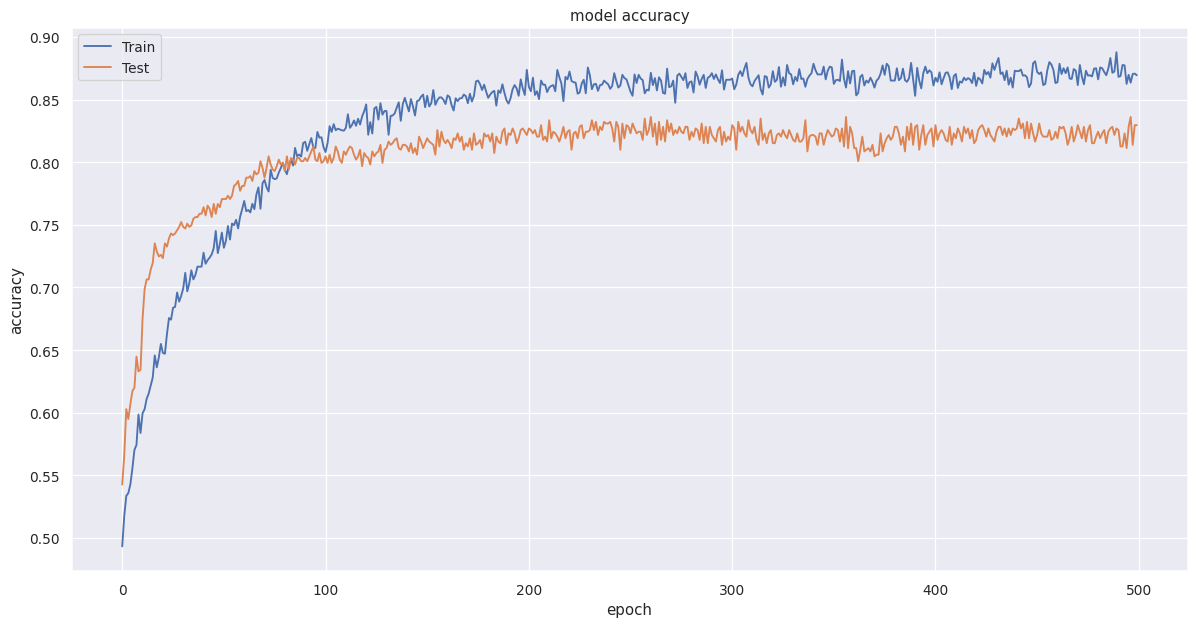

In [498]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.figure(num=None, figsize=(16, 8), dpi=90, facecolor='w', edgecolor='k')
plt.plot()
plt.plot(train_acc)
plt.plot(val_acc)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [499]:
y_predict = np.round(model.predict(X_test_norm))
y_predict = [i[0] for i in y_predict.tolist()]
sum(y_predict == y_test)/len(y_test)

0.8134171907756813

In [501]:
df_t= pd.read_csv('/kaggle/input/mailtest/MAIL_test.csv',  header = None)

In [502]:
yt = df_t[0].values
Xt = df_t.drop([0],axis = 1).values

In [503]:
X_test_norm = scaler.transform(Xt)

In [507]:
y_predict = np.round(model.predict(X_test_norm))
y_predict = [i[0] for i in y_predict.tolist()]
sum(y_predict == yt)/len(yt)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  This is separate from the ipykernel package so we can avoid doing imports until


TypeError: 'bool' object is not iterable